In [115]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
import torch.nn.functional as F
import scipy
import pandas as pd
import os
import glob
import scienceplots
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.style.use('science')
pd.set_option('display.float_format', lambda x: '%.4e' % x)
# import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
from matplotlib.text import Text
import matplotlib.tri as tri


In [138]:
n = 21
x = np.linspace(-1,1,513)
x_ = np.linspace(-1,1,n)
h = 2/(n-1)

In [142]:
h

0.1

In [139]:
# G exact
def Gexact(x):
    G = np.log(np.abs(x))
    return G

# G approx
def Gapprox(x, h):
    G = np.zeros_like(x)
    G[x>0] = ((x/h+1/2)*np.log(x+h/2) - (x/h-1/2)*np.log(x-h/2) - 1)[x>0]
    G[x==0] = np.log(h/2) - 1
    G[x<0] = ((-x/h+1/2)*np.log(-x+h/2) - (-x/h-1/2)*np.log(-x-h/2) - 1)[x<0]
    return G

In [140]:
G = Gexact(x)
G_ = Gapprox(x_, h)

/tmp/ipykernel_3159751/1162457994.py:3: RuntimeWarning: divide by zero encountered in log
  G = np.log(np.abs(x))
/tmp/ipykernel_3159751/1162457994.py:9: RuntimeWarning: invalid value encountered in log
  G[x>0] = ((x/h+1/2)*np.log(x+h/2) - (x/h-1/2)*np.log(x-h/2) - 1)[x>0]
/tmp/ipykernel_3159751/1162457994.py:11: RuntimeWarning: invalid value encountered in log
  G[x<0] = ((-x/h+1/2)*np.log(-x+h/2) - (-x/h-1/2)*np.log(-x-h/2) - 1)[x<0]


/tmp/ipykernel_3159751/1162457994.py:3: RuntimeWarning: divide by zero encountered in log
  G = np.log(np.abs(x))
/tmp/ipykernel_3159751/1162457994.py:9: RuntimeWarning: invalid value encountered in log
  G[x>0] = ((x/h+1/2)*np.log(x+h/2) - (x/h-1/2)*np.log(x-h/2) - 1)[x>0]
/tmp/ipykernel_3159751/1162457994.py:11: RuntimeWarning: invalid value encountered in log
  G[x<0] = ((-x/h+1/2)*np.log(-x+h/2) - (-x/h-1/2)*np.log(-x-h/2) - 1)[x<0]


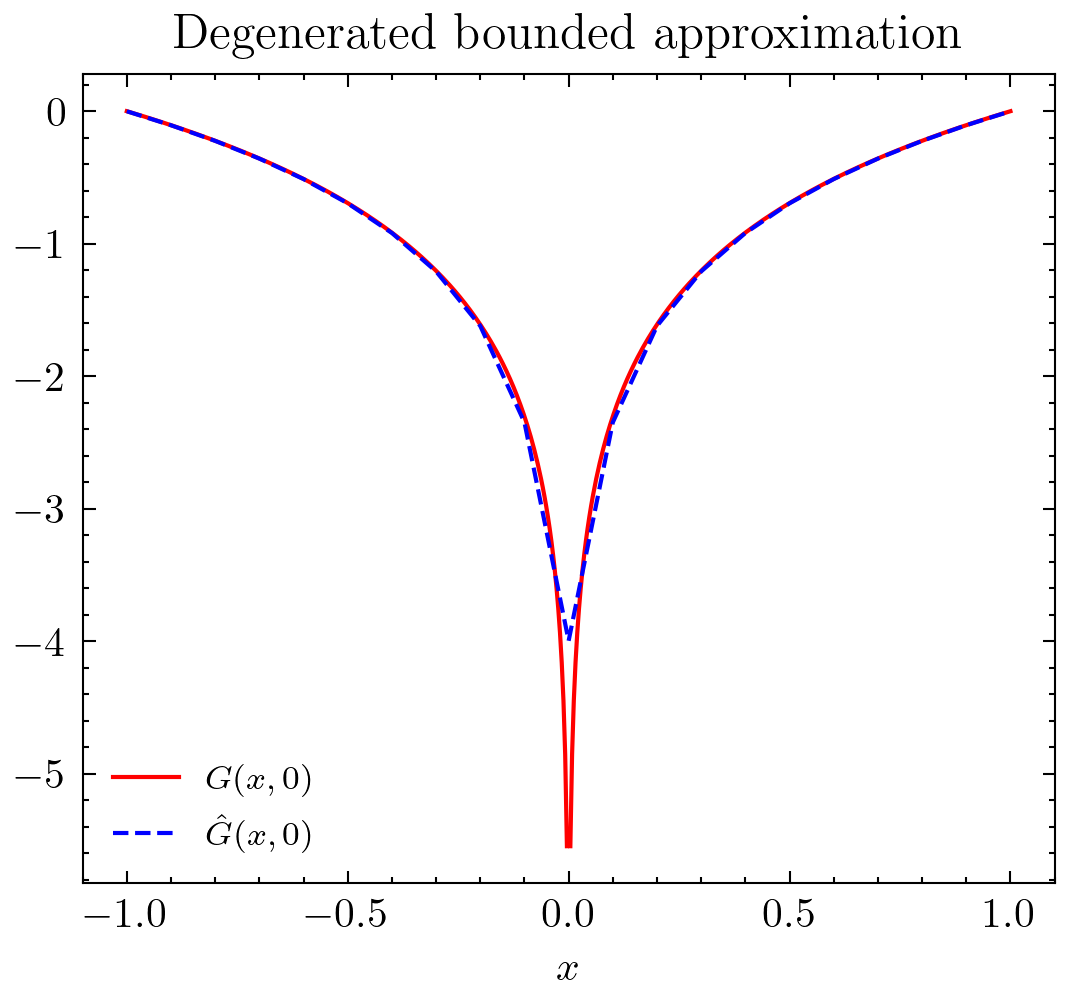

In [147]:
cm = 1/2.54
f = plt.figure(figsize=(5,3.5))
subfig = f.subfigures(1,1)
ax1 = subfig.subplots()
G = Gexact(x)
G_ = Gapprox(x_, h)

ax1.plot(x, G, '-r', label='$G(x,0)$')
ax1.plot(x_, G_, '--b', label='$\hat{G}(x,0)$')    

# ax1.set_ylim([1e-4, 1])
ax1.set_aspect(.3)
ax1.set_title("Degenerated bounded approximation")
ax1.set_xlabel("$x$")
ax1.set_ylabel("")
ax1.legend(loc='lower left', prop={'size': 8})

plt.savefig("bounded_approx.pdf")